In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#import sagemaker
#import boto3
import matplotlib.pyplot as plt 
pd.set_option('display.max_columns',None) # To display all columns
pd.set_option('display.max_rows',None) # To display all columns
#client = boto3.client('s3')
import feather
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from functools import reduce
from datetime import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
sns.set()

In [2]:
df = pd.read_feather('Dataframe27.ftr')

In [3]:
df.head()

,user_iD,question_id,user_answer,correct_answer,correct,elapsed_time,solving_id,explanation_id,bundle_id,timestamp,deployed_at
0,50,3,b,b,1.0,23.0,1729,3,3,1560337981670,2019-05-17 11:40:22.784
1,50,4,b,b,1.0,29.0,2109,4,4,1560769502979,2019-05-17 11:40:25.357
2,50,5,c,c,1.0,24.0,1883,5,5,1560513025097,2019-05-17 11:40:28.439
3,50,7,d,d,1.0,23.0,1747,7,7,1560339686648,2019-05-17 11:40:33.992
4,50,29,d,d,1.0,19.0,3905,29,29,1571227991581,2019-09-17 02:45:04.653


In [8]:
df_Bundle = df.groupby(['user_iD'], as_index=False , sort=False)['bundle_id'].count()

df_Bundle = df_Bundle.rename(columns={'bundle_id': 'Bundles_Count'})   

In [9]:
df_Bundle.head()

,user_iD,Bundles_Count
0,50,4570
1,58,5191
2,98,4731
3,99,39
4,103,6


In [14]:
df_Bundle.shape

(27884, 2)

In [12]:
df_Bundle['Bundles_Count'].describe()

count    27884.000000
mean       157.832807
std        650.709964
min          2.000000
25%          5.000000
50%          8.000000
75%         27.000000
max      11125.000000
Name: Bundles_Count, dtype: float64

In [20]:
df_Bundle['Bundles_Count'].median()

8.0

In [15]:
df2 = pd.read_feather('Bundlesinfo.ftr')

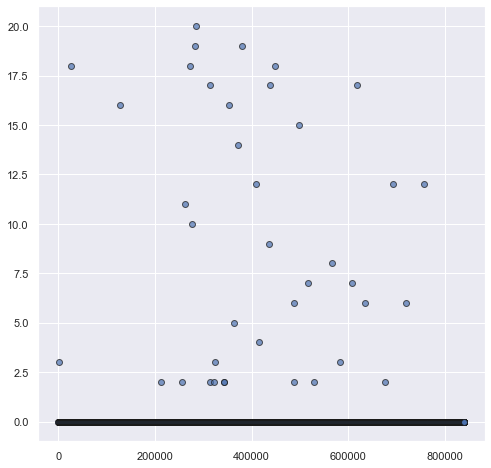

In [16]:
#Build and train the model
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(df2)

#See the predictions
model.labels_
model.cluster_centers_

#PLot the predictions against the original data set
fig = plt.figure(figsize=(8, 8))
#ax = fig.add_subplot(111)
plt.scatter(df2['user_iD'], df2['b1'],cmap='rainbow',
           linewidths=1, alpha=.7,
           edgecolor='k'
           )
plt.show()

In [17]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

df = pd.read_feather('Bundles.ftr')

# It's common to split your data into train and test groups See  
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html for more info.
df_train = df.head(500)

# put all of the feature columns into a list of lists
x_list = []
for idx, row in df_train.iterrows():
    x_list.append(row.iloc[1:].tolist())
# put our feature lists into np arrray
X = np.array(x_list)
# fit the data, tweak params as needed
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

# assign cluster labels to df
df_train['labels'] = kmeans.labels_

<ipython-input-17-a5d360735d05>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['labels'] = kmeans.labels_


In [18]:
df_train['labels'].value_counts()

1    415
5     57
7      9
3      5
0      4
2      3
6      3
9      2
4      1
8      1
Name: labels, dtype: int64

In [19]:
kmeans.predict([df.iloc[999:1000, 1:].values.flatten().tolist()])

array([1])